# downloading data form github  repo

In [82]:
from pydriller import Repository

repo_url = "spring-framework"
# see the dictionery of the commit
for commit in Repository(repo_url).traverse_commits():
    print(dir(commit))   
    break   


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_c_object', '_conf', '_delta_maintainability', '_delta_risk_profile', '_good_change_proportion', '_list_from_string', '_parse_diff', '_stats', '_stats_cache', 'author', 'author_date', 'author_timezone', 'branches', 'co_authors', 'committer', 'committer_date', 'committer_timezone', 'deletions', 'dmm_unit_complexity', 'dmm_unit_interfacing', 'dmm_unit_size', 'files', 'hash', 'in_main_branch', 'insertions', 'lines', 'merge', 'modified_files', 'msg', 'parents', 'project_name', 'project_path']


In [83]:
# to download repo wirte in the terminal git clone "github link"

In [84]:
import csv
'''
with open("fixed_file.csv", "w", newline="", encoding="utf-8") as f:
    df = csv.writer(f)
    df.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])  

    for commit in Repository(repo_url).traverse_commits():
        if "fix" in commit.msg.lower():
            for m in commit.modified_files:
                if m.filename.endswith(".java"):
                    df.writerow([
                        commit.hash,
                        commit.msg,
                        m.change_type.name,
                        m.source_code_before, 
                        m.source_code 
                    ])
'''                    




'\nwith open("fixed_file.csv", "w", newline="", encoding="utf-8") as f:\n    df = csv.writer(f)\n    df.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])  \n\n    for commit in Repository(repo_url).traverse_commits():\n        if "fix" in commit.msg.lower():\n            for m in commit.modified_files:\n                if m.filename.endswith(".java"):\n                    df.writerow([\n                        commit.hash,\n                        commit.msg,\n                        m.change_type.name,\n                        m.source_code_before, \n                        m.source_code \n                    ])\n'

### function to download commits from repo

In [85]:
import os
def extract_fixes(repo_path, output_file="fixed_file.csv"):
  
    file_exists = os.path.isfile(output_file)

    with open(output_file, "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        if not file_exists:
            writer.writerow(["Hash", "Message", "Type", "Old_Code", "New_Code"])
        
        for commit in Repository(repo_path).traverse_commits():
            if "fix" in commit.msg.lower():
                for m in commit.modified_files:
                    if m.filename.endswith(".java"): #just java files with fix commits
                        writer.writerow([
                            commit.hash,
                            commit.msg,
                            m.change_type.name,
                            m.source_code_before or "",
                            m.source_code or ""
                        ])



In [86]:
#extract_fixes("defects4j")

In [87]:
#extract_fixes("accumulo")

In [88]:
#extract_fixes("camel")

In [89]:
#extract_fixes("ISSRE2023-BugSeverityPrediction")

In [90]:
#extract_fixes("wicket")

In [91]:
#extract_fixes("jackrabbit-oak")

In [92]:
#extract_fixes("maven")

# clean the data

In [93]:
import pandas as pd  
df=pd.read_csv("fixed_file.csv")
df

,Hash,Message,Type,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
1,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,ADD,NaN,package org.springframework.http.client;\n\nim...
2,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
4,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,/*\n * Copyright 2002-present the original aut...,/*\n * Copyright 2002-present the original aut...
...,...,...,...,...,...
26757,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26758,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26759,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...
26760,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,/*\n * Licensed to the Apache Software Foundat...,/*\n * Licensed to the Apache Software Foundat...


### remove the messages from the code

In [94]:
import re
def remove_comments(code):
    if not isinstance(code, str): 
        return code
    code=re.sub(r'/\*.*?\*/', '', code, flags=re.DOTALL)  
    code=re.sub(r'//.*', '', code) 
    return code.strip()


In [95]:
df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_comments)

C:\Users\hp\AppData\Local\Temp\ipykernel_12700\2932069089.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Old_Code", "New_Code"]] = df[["Old_Code", "New_Code"]].applymap(remove_comments)


In [96]:
print(df["New_Code"].iloc[0])

package org.springframework.http.client;

import java.io.FilterInputStream;
import java.io.IOException;
import java.io.InputStream;
import java.io.UncheckedIOException;
import java.net.URI;
import java.net.http.HttpClient;
import java.net.http.HttpRequest;
import java.net.http.HttpResponse;
import java.net.http.HttpTimeoutException;
import java.nio.ByteBuffer;
import java.time.Duration;
import java.util.Collections;
import java.util.Locale;
import java.util.Set;
import java.util.TreeSet;
import java.util.concurrent.CancellationException;
import java.util.concurrent.CompletableFuture;
import java.util.concurrent.ExecutionException;
import java.util.concurrent.Executor;
import java.util.concurrent.Flow;
import java.util.concurrent.TimeUnit;
import java.util.concurrent.atomic.AtomicBoolean;

import org.springframework.http.HttpHeaders;
import org.springframework.http.HttpMethod;
import org.springframework.lang.Nullable;
import org.springframework.util.StreamUtils;
import org.springframewo

In [97]:
print(df["Type"].unique())

['MODIFY' 'ADD' 'RENAME' 'DELETE']


In [98]:
a=['MODIFY', 'ADD', 'RENAME', 'DELETE']
for t in a:
    print(f"{t}: {len(df[df['Type'] == t])}")


MODIFY: 24066
ADD: 1695
RENAME: 615
DELETE: 386


### take the only row that have modify in the type

In [99]:
df=df[df["Type"]=="MODIFY"]


In [100]:
df=df.reset_index(drop=True)
df

,Hash,Message,Type,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,MODIFY,package org.springframework.http.client;\n\nim...,package org.springframework.http.client;\n\nim...
1,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,MODIFY,package org.springframework.http.client;\n\nim...,package org.springframework.http.client;\n\nim...
2,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,MODIFY,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
4,81b4020fc6392025e5e55b2d26b7cd5bac1ca7fe,Do not load concrete types in annotation metad...,MODIFY,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
...,...,...,...,...,...
24061,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,package org.apache.maven.cling.executor.intern...,package org.apache.maven.cling.executor.intern...
24062,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,package org.apache.maven.cling.executor.impl;\...,package org.apache.maven.cling.executor.impl;\...
24063,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,package org.apache.maven.impl.standalone;\n\ni...,package org.apache.maven.impl.standalone;\n\ni...
24064,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,MODIFY,package org.apache.maven.api.plugin.testing.st...,package org.apache.maven.api.plugin.testing.st...


In [101]:
df=df.drop('Type', axis=1)
df

,Hash,Message,Old_Code,New_Code
0,7a55ce48a93f004c7acc0b51c04bb39be2c6b733,Handle CancellationException in JdkClientHttpR...,package org.springframework.http.client;\n\nim...,package org.springframework.http.client;\n\nim...
1,ffc785471bbe579aaef282720baef00a44d46435,Fix checkstyle error,package org.springframework.http.client;\n\nim...,package org.springframework.http.client;\n\nim...
2,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
3,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
4,81b4020fc6392025e5e55b2d26b7cd5bac1ca7fe,Do not load concrete types in annotation metad...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
...,...,...,...,...
24061,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,package org.apache.maven.cling.executor.intern...,package org.apache.maven.cling.executor.intern...
24062,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,package org.apache.maven.cling.executor.impl;\...,package org.apache.maven.cling.executor.impl;\...
24063,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,package org.apache.maven.impl.standalone;\n\ni...,package org.apache.maven.impl.standalone;\n\ni...
24064,b4ee1aa0450ff87433a978c2989c0ac432496863,Resolver 2.0.11 (#11043)\n\nUpdate to Resolver...,package org.apache.maven.api.plugin.testing.st...,package org.apache.maven.api.plugin.testing.st...


In [102]:
print(df['Message'].iloc[2])

Fix annotation arrays support in ClassFile metadata

As of gh-33616, Spring now supports metadata reading with the ClassFile
API on JDK 24+ runtimes. This commit fixes a bug where
`ArrayStoreException` were thrown when reading annotation attribute
values for arrays.

Fixes gh-35252


In [103]:
keywords = ['bug', 'error', 'issue', 'fault', 'fail', 'exception']
for word in keywords:
    print(df["Message"].str.contains(word, case=False).sum())

2544
3513
2959
1031
1105
1116


In [104]:
df.columns

Index(['Hash', 'Message', 'Old_Code', 'New_Code'], dtype='object')

### search for the lines that have error, bugs,fault,fail,exception or isssue in their message 

In [105]:
df_target=pd.DataFrame(columns=['Hash', 'Message', 'Old_Code', 'New_Code'])
for word in keywords:
    df_sub=df[df["Message"].str.contains(word,case=False)]
    df_target=pd.concat([df_target,df_sub],ignore_index=True)
df_target    

,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
2,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,package org.springframework.core.io.buffer;\n\...,package org.springframework.core.io.buffer;\n\...
3,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,package org.springframework.core.io.buffer;\n\...,package org.springframework.core.io.buffer;\n\...
4,764336f0f201c34ba0e636324e4b31da922c81c1,Fix Jetty DataBufferFactory memory leak\n\nPri...,package org.springframework.http.server.reacti...,package org.springframework.http.server.reacti...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\n\npublic ...,package org.apache.maven.project;\n\n\n@Deprec...
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,package org.apache.maven.lifecycle.internal.bu...,package org.apache.maven.lifecycle.internal.bu...


In [106]:
print(df_target["Message"].iloc[12267])

Fix recursive update issue in SmartProjectComparator (#10997)

Fixes #10995

The SmartProjectComparator.getProjectWeight() method was using
ConcurrentHashMap.computeIfAbsent() in a recursive context, which
could lead to IllegalStateException: Recursive update when calculating
project weights in complex dependency graphs or concurrent scenarios.

Changes:
- Replace computeIfAbsent() with explicit get() + putIfAbsent() pattern
- Eliminate recursive calls to computeIfAbsent() that violate
  ConcurrentHashMap's internal constraints
- Maintain thread safety using putIfAbsent() for concurrent access
- Add comprehensive test case to verify the fix under concurrent load

The fix preserves all existing functionality while eliminating the
recursive update exception that could occur during parallel builds
of large multi-module projects.


In [107]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12268 entries, 0 to 12267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hash      12268 non-null  object
 1   Message   12268 non-null  object
 2   Old_Code  12267 non-null  object
 3   New_Code  12268 non-null  object
dtypes: object(4)
memory usage: 383.5+ KB


In [108]:
print(df_target.iloc[1])

Hash                 2b7f88ee449fb37c81f2e3649beaa643f9537357
Message     Fix annotation arrays support in ClassFile met...
Old_Code    package org.springframework.core.type;\n\nimpo...
New_Code    package org.springframework.core.type;\n\nimpo...
Name: 1, dtype: object


In [109]:
df_target[df_target.duplicated(subset=['Old_Code', 'New_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
67,48e1cc0c1c3ac7c9d8689f743b7d2093d08a0bcd,ACCUMULO-422 Fixed two bugs caused by tserver ...,package org.apache.accumulo.server.master.tabl...,package org.apache.accumulo.server.master.tabl...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\n\npublic ...,package org.apache.maven.project;\n\n\n@Deprec...
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,package org.apache.maven.lifecycle.internal.bu...,package org.apache.maven.lifecycle.internal.bu...


In [110]:
df_target[df_target.duplicated(subset=['New_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
67,48e1cc0c1c3ac7c9d8689f743b7d2093d08a0bcd,ACCUMULO-422 Fixed two bugs caused by tserver ...,package org.apache.accumulo.server.master.tabl...,package org.apache.accumulo.server.master.tabl...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\n\npublic ...,package org.apache.maven.project;\n\n\n@Deprec...
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,package org.apache.maven.lifecycle.internal.bu...,package org.apache.maven.lifecycle.internal.bu...


In [111]:
df_target[df_target.duplicated(subset=['Old_Code'], keep=False)]


,Hash,Message,Old_Code,New_Code
0,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type.classrea...,package org.springframework.core.type.classrea...
1,2b7f88ee449fb37c81f2e3649beaa643f9537357,Fix annotation arrays support in ClassFile met...,package org.springframework.core.type;\n\nimpo...,package org.springframework.core.type;\n\nimpo...
5,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
6,8830c99effac591d19be25de2f185928dd73ba08,Merge bug mining into master (#135)\n\n* sligh...,package edu.washington.cs.mut.testrunner;\n\ni...,package edu.washington.cs.mut.testrunner;\n\ni...
10,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,package org.apache.accumulo.core.client;\n\nim...,package org.apache.accumulo.core.client;\n\nim...
...,...,...,...,...
12263,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12264,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\nimport ja...,package org.apache.maven.project;\n\nimport ja...
12265,8ce8cd0ccc8b646f231d1e5e7da54f5dcfd7f6cc,Deprecate old project builder API in favor of ...,package org.apache.maven.project;\n\n\npublic ...,package org.apache.maven.project;\n\n\n@Deprec...
12266,84bf592feac1aa409a04b4fa69d0dee61ec0cf7a,Fix recursive update issue in SmartProjectComp...,package org.apache.maven.lifecycle.internal.bu...,package org.apache.maven.lifecycle.internal.bu...


### search for the row that have the same old and new code

In [112]:
df_false=df_target[df_target['Old_Code']==df_target["New_Code"]]
print(len(df_false))
df_false

876


,Hash,Message,Old_Code,New_Code
10,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,package org.apache.accumulo.core.client;\n\nim...,package org.apache.accumulo.core.client;\n\nim...
12,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,package org.apache.accumulo.core.client.impl;\...,package org.apache.accumulo.core.client.impl;\...
17,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,package org.apache.accumulo.core.iterators;\n\...,package org.apache.accumulo.core.iterators;\n\...
30,9d13f546ebb1e716c1d25c35225190b1b2805975,ACCUMULO-155 moved some user iterators into th...,package org.apache.accumulo.core.iterators.fil...,package org.apache.accumulo.core.iterators.fil...
141,6e526d702caaae157c44254b041497d18af761d0,ACCUMULO-1129 - Implemented new getConnector m...,package org.apache.accumulo.core.security.thri...,package org.apache.accumulo.core.security.thri...
...,...,...,...,...
12075,d98b1842d5e5fa842f2aa21119adbdd4080cdc3d,Fix minor typos\n\nFix various minor typos in ...,package org.apache.maven.plugin.coreit;\n\n\n\...,package org.apache.maven.plugin.coreit;\n\n\n\...
12076,d98b1842d5e5fa842f2aa21119adbdd4080cdc3d,Fix minor typos\n\nFix various minor typos in ...,package org.apache.maven.plugin.coreit;\n\n\n\...,package org.apache.maven.plugin.coreit;\n\n\n\...
12188,bcd5d9c9f9ef87bb103dcabb24be62c7128d2fff,DI improvements (#1717)\n\n* Code cleanup\r\n*...,package org.apache.maven.api.di;\n\nimport jav...,package org.apache.maven.api.di;\n\nimport jav...
12189,bcd5d9c9f9ef87bb103dcabb24be62c7128d2fff,DI improvements (#1717)\n\n* Code cleanup\r\n*...,package org.apache.maven.api.di;\n\nimport jav...,package org.apache.maven.api.di;\n\nimport jav...


### delete the row that have the same old and new code

In [113]:
df_target=df_target[df_target['Old_Code']!=df_target['New_Code']]
df_target=df_target.dropna()
df_target.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11391 entries, 0 to 12267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hash      11391 non-null  object
 1   Message   11391 non-null  object
 2   Old_Code  11391 non-null  object
 3   New_Code  11391 non-null  object
dtypes: object(4)
memory usage: 445.0+ KB


In [114]:
print(df_target["Old_Code"].iloc[0])

package org.springframework.core.type.classreading;


import java.lang.classfile.Annotation;
import java.lang.classfile.AnnotationElement;
import java.lang.classfile.AnnotationValue;
import java.lang.classfile.attribute.RuntimeVisibleAnnotationsAttribute;
import java.lang.constant.ClassDesc;
import java.lang.reflect.Array;
import java.util.Collections;
import java.util.LinkedHashMap;
import java.util.Map;
import java.util.Objects;
import java.util.Set;
import java.util.stream.Collectors;
import java.util.stream.Stream;

import org.jspecify.annotations.Nullable;

import org.springframework.core.annotation.AnnotationFilter;
import org.springframework.core.annotation.MergedAnnotation;
import org.springframework.core.annotation.MergedAnnotations;
import org.springframework.util.ClassUtils;


abstract class ClassFileAnnotationMetadata {

	static MergedAnnotations createMergedAnnotations(String className, RuntimeVisibleAnnotationsAttribute annotationAttribute, @Nullable ClassLoader classLoad

### function to compare old and new code

In [115]:
import difflib
def compare_code(old_code, new_code):
    old_lines=str(old_code).splitlines()
    new_lines=str(new_code).splitlines()
    diff=difflib.unified_diff(
        old_lines, new_lines,
        fromfile="Old_Code", 
        tofile="New_Code", 
        lineterm=""
    )
    return "\n".join(diff)


In [116]:
print(compare_code(df_target["Old_Code"].iloc[10010],df_target["New_Code"].iloc[10010]))
print(df_target["Message"].iloc[10010])

--- Old_Code
+++ New_Code
@@ -1,18 +1,18 @@
 package org.apache.jackrabbit.oak.spi.state;
 
+import javax.annotation.Nonnull;
+
 import org.apache.jackrabbit.oak.api.CommitFailedException;
-
-import javax.annotation.Nonnull;
 
 public interface NodeStoreBranch {
 
     
     @Nonnull
-    NodeState getRoot();
+    NodeState getBase();
 
     
     @Nonnull
-    NodeState getBase();
+    NodeState getRoot();
 
     
     void setRoot(NodeState newRoot);
OAK-251 : CommitEditor is global to ContentRepository instance  (WIP)
- add initial draft that allows to extend the commit-editor passed in to the repository constructor

OAK-51 : Implement JCR Access Control Management 
- enforce dummy permission validation upon commit

OAK-50 : UserManagement
- enforce user-validation upon commit

OAK-64 : Privilege Management 
- enforce privilege validation upon commit (currently disabled due to core-tests that don't setup mandatory
   repository content and therefore fail).
   
OAK-125 	: Improved na

In [117]:
df_bug=pd.DataFrame(columns=["AfterFix"])
df_bug["AfterFix"] = df_target["Message"].str.extract(r'(?i)fix[:\s]*(.*)')
df_bug

,AfterFix
0,annotation arrays support in ClassFile metadata
1,annotation arrays support in ClassFile metadata
2,Jetty DataBufferFactory memory leak
3,Jetty DataBufferFactory memory leak
4,Jetty DataBufferFactory memory leak
...,...
12263,es apache/maven#10984
12264,es apache/maven#10984
12265,es apache/maven#10984
12266,recursive update issue in SmartProjectComparat...


In [118]:
df_bug=df_bug.reset_index()

In [119]:
df_target["Message"].iloc[11390]

"Fix recursive update issue in SmartProjectComparator (#10997)\n\nFixes #10995\n\nThe SmartProjectComparator.getProjectWeight() method was using\nConcurrentHashMap.computeIfAbsent() in a recursive context, which\ncould lead to IllegalStateException: Recursive update when calculating\nproject weights in complex dependency graphs or concurrent scenarios.\n\nChanges:\n- Replace computeIfAbsent() with explicit get() + putIfAbsent() pattern\n- Eliminate recursive calls to computeIfAbsent() that violate\n  ConcurrentHashMap's internal constraints\n- Maintain thread safety using putIfAbsent() for concurrent access\n- Add comprehensive test case to verify the fix under concurrent load\n\nThe fix preserves all existing functionality while eliminating the\nrecursive update exception that could occur during parallel builds\nof large multi-module projects."

In [120]:
df_target=df_target.reset_index(drop=True)

In [121]:
count=df_bug["AfterFix"].str.contains("apache/maven#10984", na=False).sum()
print(count)


28


In [122]:
print(df_bug["AfterFix"].nunique())

1848


### split the data

In [123]:
new=pd.DataFrame(columns=["code","bugy"])
new["code"]=df_target["New_Code"]
new["bugy"]=0
new

,code,bugy
0,package org.springframework.core.type.classrea...,0
1,package org.springframework.core.type;\n\nimpo...,0
2,package org.springframework.core.io.buffer;\n\...,0
3,package org.springframework.core.io.buffer;\n\...,0
4,package org.springframework.http.server.reacti...,0
...,...,...
11386,package org.apache.maven.project;\n\nimport ja...,0
11387,package org.apache.maven.project;\n\nimport ja...,0
11388,package org.apache.maven.project;\n\n\n@Deprec...,0
11389,package org.apache.maven.lifecycle.internal.bu...,0


In [124]:
old=pd.DataFrame(columns=["code","bugy"])
old["code"]=df_target["Old_Code"]
old["bugy"]=1
old

,code,bugy
0,package org.springframework.core.type.classrea...,1
1,package org.springframework.core.type;\n\nimpo...,1
2,package org.springframework.core.io.buffer;\n\...,1
3,package org.springframework.core.io.buffer;\n\...,1
4,package org.springframework.http.server.reacti...,1
...,...,...
11386,package org.apache.maven.project;\n\nimport ja...,1
11387,package org.apache.maven.project;\n\nimport ja...,1
11388,package org.apache.maven.project;\n\n\npublic ...,1
11389,package org.apache.maven.lifecycle.internal.bu...,1


In [125]:
my_df=pd.concat([old,new],ignore_index=True)
my_df

,code,bugy
0,package org.springframework.core.type.classrea...,1
1,package org.springframework.core.type;\n\nimpo...,1
2,package org.springframework.core.io.buffer;\n\...,1
3,package org.springframework.core.io.buffer;\n\...,1
4,package org.springframework.http.server.reacti...,1
...,...,...
22777,package org.apache.maven.project;\n\nimport ja...,0
22778,package org.apache.maven.project;\n\nimport ja...,0
22779,package org.apache.maven.project;\n\n\n@Deprec...,0
22780,package org.apache.maven.lifecycle.internal.bu...,0


In [126]:
my_df=my_df.sample(frac=1).reset_index(drop=True)
my_df

,code,bugy
0,package org.apache.camel.builder.xml;\n\nimpor...,0
1,package org.apache.camel.component.jms;\n\nimp...,1
2,package org.apache.maven.internal.aether;\n\ni...,0
3,package org.apache.camel.component.file;\n\nim...,0
4,package wicket.markup.html.form.encryption;\n\...,0
...,...,...
22777,package org.apache.accumulo.server.constraints...,0
22778,package wicket.markup.html.link;\n\nimport org...,1
22779,package org.apache.maven.it;\n\n\n\nimport org...,1
22780,package org.apache.camel.loanbroker.queue.vers...,0


In [127]:
x=my_df["code"]
y=my_df["bugy"]

In [128]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22782 entries, 0 to 22781
Series name: code
Non-Null Count  Dtype 
--------------  ----- 
22782 non-null  object
dtypes: object(1)
memory usage: 178.1+ KB


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,silhouette_score,classification_report,f1_score,confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### building tfidf and logistique regression piplines and testing it

In [130]:
pip1=Pipeline([
    ("tfidf",(TfidfVectorizer())),
    ("clf",(LogisticRegression(max_iter=100)))
    ])
pip1.fit(x_train,y_train)
y_pred1=pip1.predict(x_test)
print("classification_report:", classification_report(y_pred1,y_test))
print("accuracy_score:", accuracy_score(y_pred1,y_test))
print(f1_score(y_pred1,y_test,average="macro"))

classification_report:               precision    recall  f1-score   support

           0       0.36      0.34      0.35      3523
           1       0.33      0.34      0.34      3312

    accuracy                           0.34      6835
   macro avg       0.34      0.34      0.34      6835
weighted avg       0.34      0.34      0.34      6835

accuracy_score: 0.3417702999268471
0.3417195732508449


In [131]:
import matplotlib.pyplot as plt  
import seaborn as sns

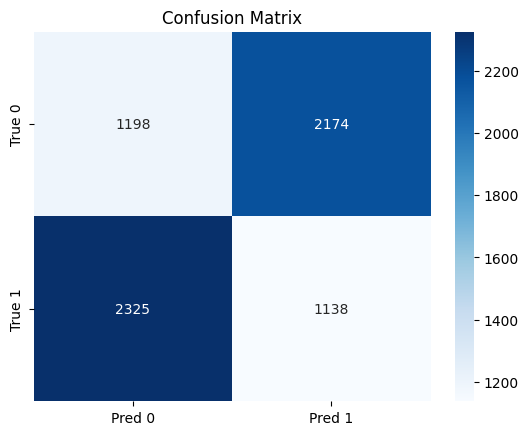

[[1198 2174]
 [2325 1138]]


In [132]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["True 0","True 1"])
plt.title("Confusion Matrix")
plt.show()
print(cm)

#### pip1 is bad make many mistakes

In [133]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip1.predict([test_code]))
print(pip1.predict_proba([test_code]))


<class 'str'>
[1]
[[0.39386671 0.60613329]]


In [134]:
pip2=Pipeline([
    ("tfidf",(TfidfVectorizer())),
    ("clf",(RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=-1)))
    ])
pip2.fit(x_train,y_train)
y_pred2=pip2.predict(x_test)
print("classification_report:", classification_report(y_pred2,y_test))
print("accuracy_score:", accuracy_score(y_pred2,y_test))
print(f1_score(y_pred2,y_test,average="macro"))

classification_report:               precision    recall  f1-score   support

           0       0.45      0.41      0.43      3707
           1       0.37      0.41      0.39      3128

    accuracy                           0.41      6835
   macro avg       0.41      0.41      0.41      6835
weighted avg       0.42      0.41      0.41      6835

accuracy_score: 0.4128749085588881
0.4121257270157551


In [135]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip2.predict([test_code]))
print(pip2.predict_proba([test_code]))

<class 'str'>
[0]
[[0.50696051 0.49303949]]


In [136]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip2.predict([test_code]))
print(pip2.predict_proba([test_code]))


<class 'str'>
[0]
[[0.50696051 0.49303949]]


In [137]:
print(confusion_matrix(y_test,y_pred2))

[[1533 1839]
 [2174 1289]]


In [138]:
from xgboost import XGBClassifier

In [139]:
pip3=Pipeline([
    ("tfidf",(TfidfVectorizer())),
    ("clf",(XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )))
    ])
pip3.fit(x_train,y_train)
y_pred3=pip3.predict(x_test)
print("classification_report:", classification_report(y_pred3,y_test))
print("accuracy_score:", accuracy_score(y_pred3,y_test))
print(f1_score(y_pred3,y_test,average="macro"))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


classification_report:               precision    recall  f1-score   support

           0       0.43      0.42      0.42      3402
           1       0.43      0.44      0.43      3433

    accuracy                           0.43      6835
   macro avg       0.43      0.43      0.43      6835
weighted avg       0.43      0.43      0.43      6835

accuracy_score: 0.42911485003657646
0.42906937574196957


In [140]:
test_code='''public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
'''
print(type(test_code))
print(pip3.predict([test_code]))
print(pip3.predict_proba([test_code]))


<class 'str'>
[1]
[[0.47786278 0.5221372 ]]


### building cnn model

In [141]:
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [142]:
from tensorflow.keras import initializers, regularizers, constraints,layers,models

default_args = {
    "kernel_initializer": initializers.GlorotUniform(),
    "bias_initializer": "zeros",
    "kernel_regularizer": None,
    "bias_regularizer": None,
    "activity_regularizer": None,
    "kernel_constraint": None,
    "bias_constraint": None
}
model=models.Sequential([
    layers.Conv1D(32, 3, activation=None, input_shape=(100, 1), **default_args),
    layers.Conv1D(64, 3, activation=None, **default_args),
    layers.Flatten(),
    layers.Dense(128, activation=None, **default_args),
    layers.Dense(1, activation="sigmoid", **default_args)
])



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=10000)   
tokenizer.fit_on_texts(x_train)           
sequences=tokenizer.texts_to_sequences(x_train)
X=pad_sequences(sequences, maxlen=100)



In [144]:
import numpy as np

In [145]:
YTest=np.array(y_test)
YTrain=np.array(y_train)

In [150]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [154]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)


In [155]:
model.fit(X, YTrain, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5023 - loss: 108.8131 - val_accuracy: 0.4912 - val_loss: 6.9050
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4970 - loss: 5.2335 - val_accuracy: 0.5003 - val_loss: 4.1076
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4966 - loss: 3.0795 - val_accuracy: 0.4940 - val_loss: 2.1724
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4989 - loss: 2.1038 - val_accuracy: 0.5082 - val_loss: 1.4174
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5003 - loss: 1.7471 - val_accuracy: 0.5013 - val_loss: 1.1978
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4989 - loss: 1.0114 - val_accuracy: 0.5135 - val_loss: 0.8209
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5051 - loss: 0.8743 - val_accuracy: 0.5088 - val_loss: 0.7735
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5054 - loss: 0.8021 - val_

In [156]:
tokenizer.fit_on_texts(x_test)           
sequences=tokenizer.texts_to_sequences(x_test)
XTEST=pad_sequences(sequences, maxlen=100)  
result=y_pred=(model.predict(XTEST) > 0.5).astype("int32")


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [157]:
result=np.array(result)
result

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], shape=(6835, 1), dtype=int32)

In [158]:
print(accuracy_score(result,y_test))

0.5002194586686174


In [169]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58      3372
           1       0.51      0.31      0.39      3463

    accuracy                           0.50      6835
   macro avg       0.50      0.50      0.48      6835
weighted avg       0.50      0.50      0.48      6835



In [168]:
print(f1_score(y_test,result,average='macro'))

0.4822600751061674


In [159]:
print(confusion_matrix(result,y_test))

[[2346 2390]
 [1026 1073]]


In [165]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

test_code = '''public class EpochExample {
    public static void main(String[] args) {
        int dataSize = 10;   
        int batchSize = 2;   
        int epochs = 3;     

        
        for (int epoch = 1; epoch <= epochs; epoch++) {
            System.out.println("Epoch " + epoch + "/" + epochs);

            
            for (int i = 0; i < dataSize; i += batchSize) {
                int end = Math.min(i + batchSize, dataSize);
                System.out.println("  Processing batch: " + (i+1) + " to " + end);
            }
        }
    }
}
'''
seq=tokenizer.texts_to_sequences([test_code])
seq_padded=pad_sequences(seq, maxlen=100)
X_test_code = seq_padded.reshape(seq_padded.shape[0], seq_padded.shape[1], 1).astype('float32')
pred_prob=model.predict(X_test_code)
pred_label=(pred_prob > 0.5).astype(int)
print("Probability of bug:", pred_prob)
print("Predicted label (0=no bug, 1=bug):", pred_label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Probability of bug: [[0.43459517]]
Predicted label (0=no bug, 1=bug): [[0]]


In [167]:
hello_code='''
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, world!");
    }
}
'''
seq=tokenizer.texts_to_sequences([hello_code])
seq_padded=pad_sequences(seq,maxlen=100)
hello_code=seq_padded.reshape(seq_padded.shape[0],seq_padded.shape[1],1).astype('float32')
pred_prob=model.predict(hello_code)
pred_label=(pred_prob > 0.5).astype(int)
print("Probability of bug:", pred_prob)
print("Predicted label (0=no bug, 1=bug):", pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Probability of bug: [[0.42660484]]
Predicted label (0=no bug, 1=bug): [[0]]


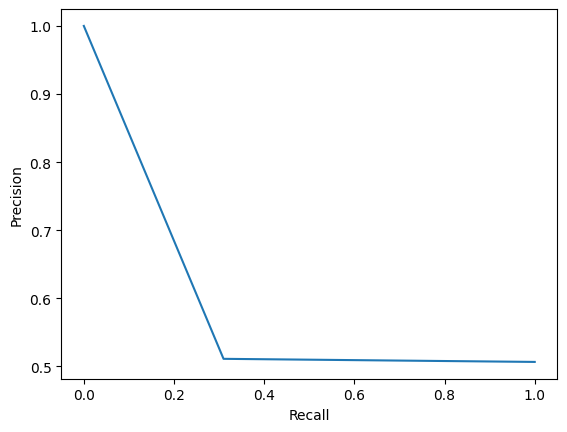

In [175]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, result)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [ ]:
#model.save("model.h5")